# **AIN 214 - PA2 - FALL 2024**

**Student Number** :

**Name Surname**   :


BELOW MD CELLS CONTAIN THE QUESTIONS YOU ARE ASKED TO IMPLEMENT WITHIN THE CONTEXT OF THIS HW. PLEASE FILL IN THE CELLS FOR THE ANSWERS RIGHT BELOW THE MD CELL OF THE QUESTION. YOU CAN ADD AS MANY CELLS AS YOU WANT, BE IT CODE OR MD, SO LONG AS YOU PROVIDE UNDERSTANDABLE AND TRACEABLE REPORTING. PLEASE ADD COMMENTS ON YOUR CODES. ALSO, FILL IN MD CELLS WHERE YOU ARE ASKED TO COMMENT ON YOUR RESULTS OR EXPLAIN YOUR REASONING. ALSO, PLEASE DO NOT HESITATE TO USE THEM FOR YOUR OWN REPORTING PURPOSES. PLEASE KEEP IN MIND THAT, REPORTING IS A KEY STEP IN DATA SCIENCE.

**Deadline: 08.11.2024 (23:59:59)**

**Submission:** Submit your Jupyter Notebooks via https://submit.cs.hacettepe.edu.tr/

<font color='red'> **!!! PLEASE RUN YOUR CODE.   THE OUTPUT OF YOUR CODE MUST BE VISIBLE. DO NOT DELETE OR HIDE THE OUTPUT.**</font>

# **Necessary Imports**

In [1]:
# Import required libraries
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

# Veriyi yükle

connection=sql.connect("mydatabase.db")
cursor=connection.cursor()

# **PART- 1**

**Set of Questions on Healthcare Management System (60 Pts)**



For this part, you will use a dataset related to a Healthcare Management System. The dataset includes information about patients, doctors, medical procedures, and healthcare operations.



* **Patients**: There are many patients within the healthcare system. The system holds details that help identify the patient, such as the name and email of the patient receiving medical care.

* **Doctors**: Profiles of healthcare professionals within the facility are stored. Each record provides information about the doctor's identity, including name, specialty and contact information, which is crucial for directing patients to appropriate medical services and ensuring effective communication.

* **Appointments**: Tracks all scheduled visits between patients and doctors and serves as a vital component of the health management system. It keeps records of the appointment date and time, the patient and doctor involved and plays a critical role in managing patient flow and optimizing the use of healthcare resources.

* **Medical Procedures**: It is necessary to catalog the various treatments and diagnostic services offered by the healthcare facility. It is essential to provide clarity on the types of medical interventions available, which aids both clinical and financial planning.

* **Billing**: It is important to record all financial transactions related to patient appointments and procedures. It keeps track of the items billed to patients along with their respective amounts, which is crucial for the financial health of the health facility, allowing for accurate monitoring of income and outstanding balances.


This dataset will be used to design a relational database for managing healthcare operations, which includes data about patients, doctors, appointments, and more. Your task is to build an efficient database schema and write SQL queries.

---


**Dataset Path:** "Data/Appointments_procedures.csv, Patient_billing.csv , Doctors.csv"
  
---

**Note:** Use sqite3 python package for DB

---

# **Q1**. Design your schema as tables. Draw the necessary tables with the appropriate attributes. State the primary keys, foreign keys (and their references). Create the tables in your schema in the database. (10 Points)

There is no single soluion here, come up with your own design.

\<**your design here**\>




---


***Example Table***:

| Column   | Type  | Key      | Description                              |
|----------|-------|----------|------------------------------------------|
| ID       | INTEGER| PK      | Unique identifier table1                 |
| ID2      | INTEGER| FK      | identifier table2                        |
| Name     | TEXT   |         | patient name                             |
| FOREIGN KEY (ID2) REFERENCES table2(ID2)     |    |          |         |







In [2]:
# Patients tablosunu oluşturma pATİENTS_BİLLİNGS
cursor.execute("""
CREATE TABLE IF NOT EXISTS Patients (
    PatientID INTEGER PRIMARY KEY, 
    firstname TEXT NOT NULL,
    lastname TEXT NOT NULL,
    email TEXT NOT NULL,
    InvoiceID TEXT NOT NULL,
    Items TEXT,
    Amount REAL
);
""")
df = pd.read_csv("Data/Patient_billing.csv")
rows_as_lists = df.values.tolist()

for row in rows_as_lists:
    patient_id = row[0]  # PatientID'nin ilk sütunda olduğunu varsayıyoruz
    cursor.execute("SELECT COUNT(*) FROM Patients WHERE PatientID = ?", (patient_id,))
    
    if cursor.fetchone()[0] == 0:  # Eğer PatientID zaten yoksa
        cursor.execute("INSERT INTO Patients (PatientID, firstname, lastname, email, InvoiceID, Items, Amount) VALUES (?,?,?,?,?,?,?)", row)
    else:  # Eğer PatientID zaten varsa, güncelleme yap
        cursor.execute("""
            UPDATE Patients 
            SET firstname = ?, lastname = ?, email = ?, InvoiceID = ?, Items = ?, Amount = ?
            WHERE PatientID = ?
        """, (row[1], row[2], row[3], row[4], row[5], row[6], patient_id))

 


# Doctors tablosunu oluşturma DOCTORS
cursor.execute("""
CREATE TABLE IF NOT EXISTS Doctors (
    DoctorID INTEGER PRIMARY KEY,
    Name TEXT NOT NULL,
    Specialization TEXT NOT NULL,
    DoctorContact TEXT NOT NULL
);
""")
df = pd.read_csv("Data/Doctors.csv")
rows_as_lists = df.values.tolist()

for row in rows_as_lists:
    doctor_id = row[0]  # DoctorId'nin ilk sütunda olduğunu varsayıyoruz
    
    # DoctorId'nin zaten mevcut olup olmadığını kontrol et
    cursor.execute("SELECT COUNT(*) FROM Doctors WHERE DoctorId = ?", (doctor_id,))
    
    if cursor.fetchone()[0] == 0:  # Eğer DoctorId mevcut değilse, yeni bir kayıt ekle
        cursor.execute("INSERT INTO Doctors (DoctorId, Name, Specialization, DoctorContact) VALUES (?,?,?,?)", row)
    else:  # Eğer DoctorId mevcutsa, verileri güncelle
        cursor.execute("""
            UPDATE Doctors 
            SET Name = ?, Specialization = ?, DoctorContact = ?
            WHERE DoctorId = ?
        """, (row[1], row[2], row[3], doctor_id))

# Appointments tablosunu oluşturma APOİNTMENT PROCEDURES
cursor.execute("""
CREATE TABLE IF NOT EXISTS Appointments (
    AppointmentID INTEGER PRIMARY KEY,
    Date DATE NOT NULL,
    Time TIMESTAMP NOT NULL,
    PatientID INTEGER NOT NULL,
    DoctorID INTEGER NOT NULL,
    ProcedureID INTEGER NOT NULL,
    ProcedureName TEXT NOT NULL,
    FOREIGN KEY (PatientID) REFERENCES Patients(PatientID),
    FOREIGN KEY (DoctorID) REFERENCES Doctors(DoctorID)
);
""")
df = pd.read_csv("Data/Appointments_procedures.csv")
rows_as_lists = df.values.tolist() 
for row in rows_as_lists:
    appointment_id = row[0]  # AppointmentID'nin ilk sütunda olduğunu varsayıyoruz
    cursor.execute("SELECT COUNT(*) FROM Appointments WHERE AppointmentID = ?", (appointment_id,))
    if cursor.fetchone()[0] == 0:  # Eğer AppointmentID zaten yoksa
        cursor.execute("INSERT INTO Appointments (AppointmentID, Date, Time, PatientID, DoctorID, ProcedureID, ProcedureName) VALUES (?,?,?,?,?,?,?)", row)
    else:
        # Veriyi güncellemek isterseniz, burada güncelleme işlemi yapabilirsiniz.
        cursor.execute("""
            UPDATE Appointments 
            SET Date = ?, Time = ?, PatientID = ?, DoctorID = ?, ProcedureID = ?, ProcedureName = ?
            WHERE AppointmentID = ?
        """, (row[1], row[2], row[3], row[4], row[5], row[6], appointment_id))






# **Q2**.  Write a SQL query that retrieves the top 5 doctors based on the total number of appointments they have conducted. The results should include each doctor's doctor_id, doctor_name, and the corresponding total_appointments they have handled.(10 Points)

In [3]:
# your code here
cursor.execute("""
                SELECT 
                    d.DoctorID,
                    d.Name AS doctor_Name,
                    COUNT(a.AppointmentID) AS total_appointments
                FROM 
                    Doctors d
                JOIN 
                    Appointments a 
                ON 
                    d.DoctorID = a.DoctorID
                GROUP BY 
                    d.DoctorID, d.Name
                ORDER BY 
                    total_appointments DESC
                LIMIT 5;
""")


# **Q3**.  Calculates the total billing amount for each patient. The output should present each patient's patient_id, first_name, last_name, and the total_billed_amount. List the amount of the bill in descending order.(10 Points)

In [4]:
# your code here
cursor.execute("""
SELECT 
    p.PatientID,
    p.firstname,
    p.lastname,
    SUM(p.Amount) AS total_billed_amount
FROM 
    Patients p
JOIN 
    Appointments a ON p.PatientID = a.PatientID
GROUP BY 
    p.PatientID, p.firstname, p.lastname
ORDER BY 
    total_billed_amount DESC;


""")

# **Q4**. Write a SQL query to find the most common medical procedures for every doctor. The result should include the doctor_id, doctor_name, procedure_name, and the count of how many times each procedure has been performed (procedure_count). (10 Points)

In [5]:
cursor.execute("""
SELECT 
    d.DoctorID,
    d.Name AS DoctorName,
    a.ProcedureID,
    COUNT(a.AppointmentID) AS ProcedureCount
FROM 
    Appointments a
JOIN 
    Doctors d ON a.DoctorID = d.DoctorID
GROUP BY 
    d.DoctorID, d.Name, a.ProcedureID
ORDER BY 
    ProcedureCount DESC;


""")

# **Q5**. Calculate the total revenue generated by each doctor from the procedures they have performed. The output should display the doctor_id, first_name and the total revenue (total_revenue) attributed to each doctor. (10 Points)

In [6]:
# your code here
cursor.execute("""
SELECT 
    d.DoctorID,
    d.Name AS DoctorName,
    SUM(p.Amount) AS TotalRevenue
FROM 
    Appointments a
JOIN 
    Doctors d ON a.DoctorID = d.DoctorID
JOIN 
    Patients p ON a.PatientID = p.PatientID
GROUP BY 
    d.DoctorID, d.Name
ORDER BY 
    TotalRevenue DESC;


""")

# **Q6.** Identify patients who have had multiple appointments. The query should return the patient_id, first_name, last_name, and appointment_count. List the appointment_count in descending order. (10 Points)

In [7]:
cursor.execute("""
SELECT 
    p.PatientID,
    p.firstname,
    p.lastname,
    COUNT(a.AppointmentID) AS appointment_count
FROM 
    Patients p
JOIN 
    Appointments a ON p.PatientID = a.PatientID
GROUP BY 
    p.PatientID
HAVING 
    COUNT(a.AppointmentID) > 1
ORDER BY 
    appointment_count DESC;
""")


# **PART- 2**

**Set of Questions : DATA ANALYSIS WITH VISUALIZATION TOOLS** **(40 Pts)**

Answer the following questions, using visualization tools, and comment on your work.

---

**Dataset Path**: "Data/Suicides.csv"

---



# **Q1.** Create a pivot table showing the average suicide rate by country and year.  Which countries have the highest and lowest average suicide rates over the years? Analyze the data using this graph.(8 Points)


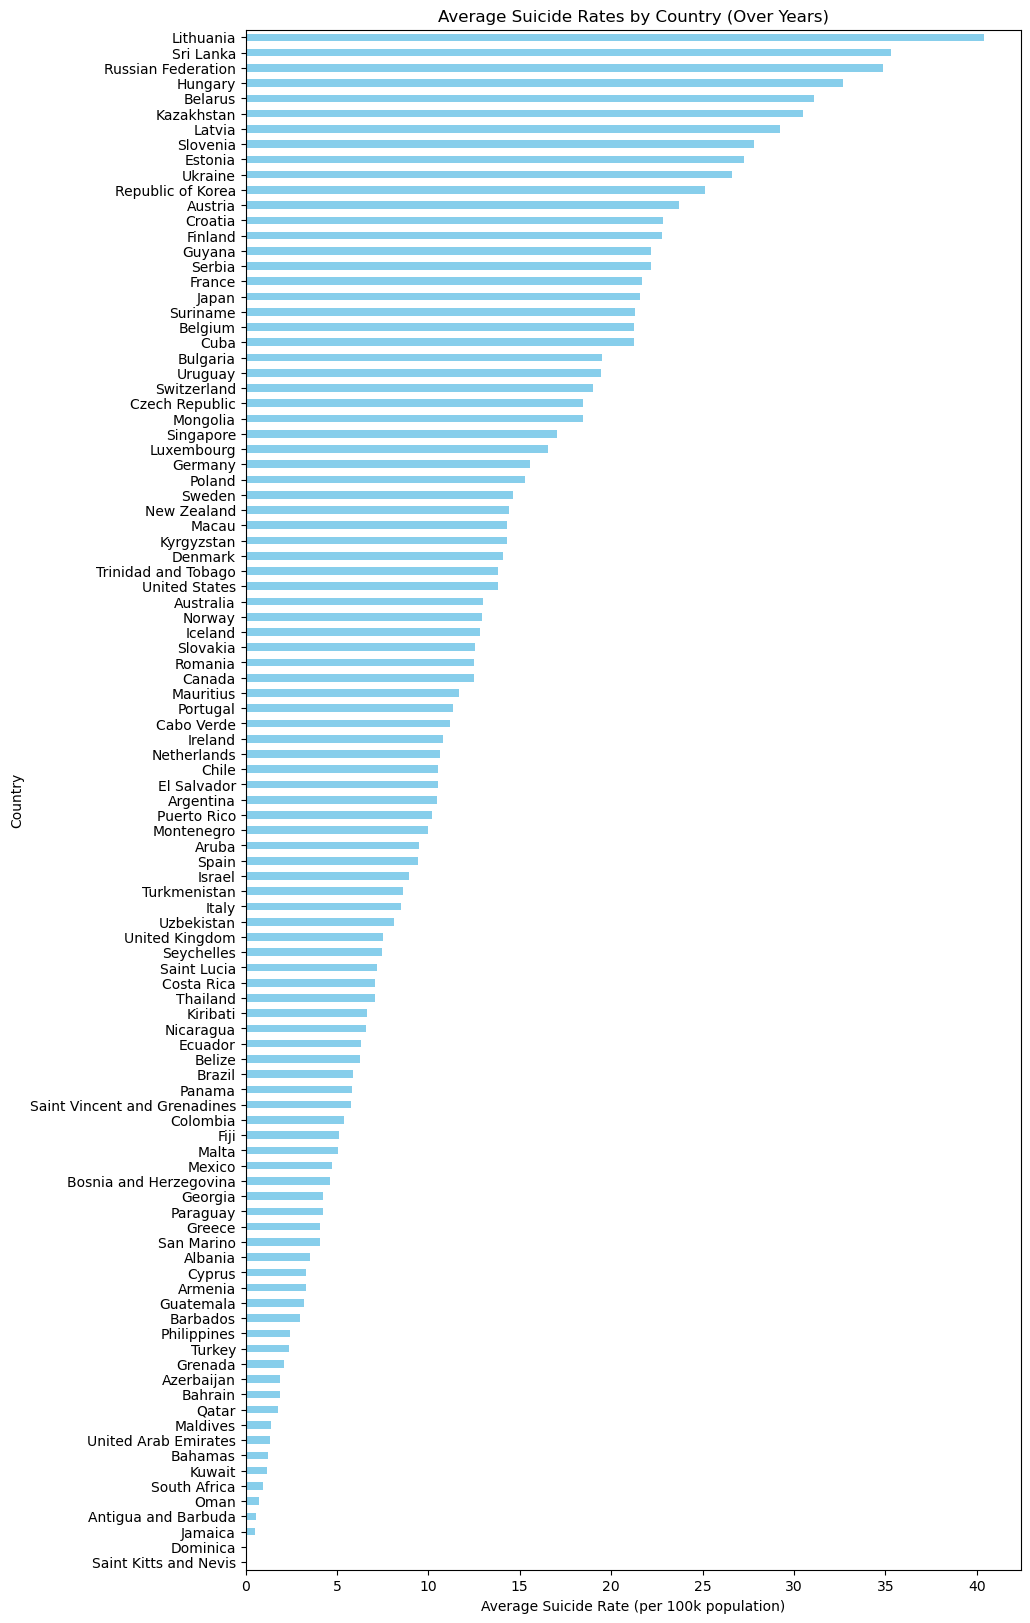

Highest average suicide rate: Lithuania
Lowest average suicide rate: Dominica


In [8]:

data = pd.read_csv("Data/Suicides.csv")

pivot_table = data.pivot_table(values='suicides/100k pop', 
                               index='country', 
                               columns='year', 
                               aggfunc='mean')


pivot_table['average_rate'] = pivot_table.mean(axis=1)

highest_rate_country = pivot_table['average_rate'].idxmax()
lowest_rate_country = pivot_table['average_rate'].idxmin()

plt.figure(figsize=(10,20))
pivot_table['average_rate'].sort_values().plot(kind='barh', color='skyblue')
plt.title('Average Suicide Rates by Country (Over Years)')
plt.xlabel('Average Suicide Rate (per 100k population)')
plt.ylabel('Country')
plt.show()

print(f"Highest average suicide rate: {highest_rate_country}")
print(f"Lowest average suicide rate: {lowest_rate_country}")


# **Q2**. Create a histogram to visualize the distribution of suicide rates. What is the most common range of suicide rates across countries? Comment on the findings about this graph.(8 Points)

In [9]:

df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')
suicide_rates = df['suicides/100k pop'].dropna()
plt.figure(figsize=(10, 6))
plt.hist(suicide_rates, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Suicide Rates Across Countries')
plt.xlabel('Suicide Rate (per 100k population)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


suicide_rate_range = pd.cut(suicide_rates, bins=30).value_counts().idxmax()
print(f"The most common range of suicide rates is: {suicide_rate_range}")


KeyError: 'suicides/100k pop'

# **Q3**. Using a pie chart , show the proportion of total suicides by gender for the most recent year available in the dataset. How do suicide rates differ between genders? Comment about your findings. (8 Points)

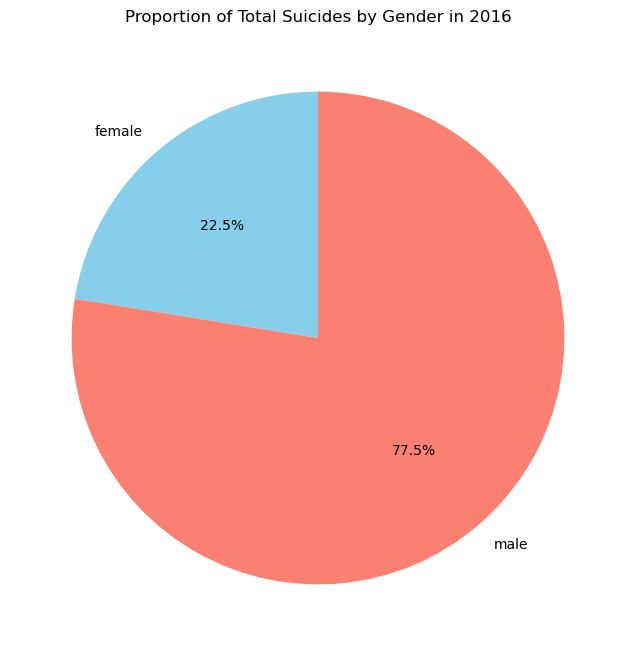

Male suicides: 77.54% of total suicides
Female suicides: 22.46% of total suicides


In [ ]:



most_recent_year = df['year'].max()
recent_data = df[df['year'] == most_recent_year]

gender_suicides = recent_data.groupby('sex')['suicides_no'].sum()


plt.figure(figsize=(8, 8))
gender_suicides.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'])
plt.title(f"Proportion of Total Suicides by Gender in {most_recent_year}")
plt.ylabel('')  # Y-axis etiketi gizle
plt.show()


total_suicides = gender_suicides.sum()
male_ratio = gender_suicides['male'] / total_suicides * 100
female_ratio = gender_suicides['female'] / total_suicides * 100

print(f"Male suicides: {male_ratio:.2f}% of total suicides")
print(f"Female suicides: {female_ratio:.2f}% of total suicides")


# **Q4**. Create a scatter plot showing the relationship between GDP per capita and suicide rate. Is there a correlation between a country's wealth (GDP per capita) and its suicide rates? Comment on any correlations or patterns you observe.(8 Points)

int64


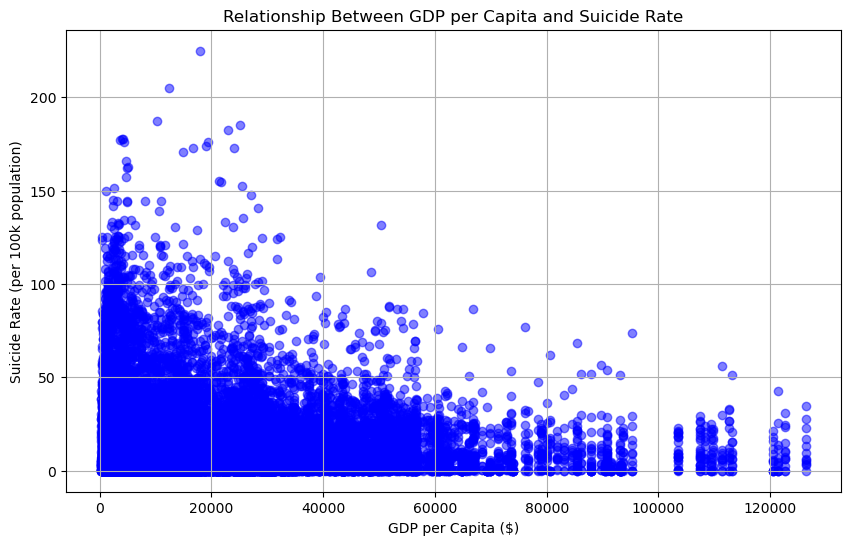

Correlation between GDP per Capita and Suicide Rate: 0.00


In [ ]:

print(df['gdp_per_capita ($)'].dtype)


if df['gdp_per_capita ($)'].dtype == 'object':
    df['gdp_per_capita ($)'] = df['gdp_per_capita ($)'].str.replace(',', '').astype(float)

df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')

df = df.dropna(subset=['gdp_per_capita ($)', 'suicides/100k pop'])


plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita ($)'], df['suicides/100k pop'], alpha=0.5, color='blue')
plt.title('Relationship Between GDP per Capita and Suicide Rate')
plt.xlabel('GDP per Capita ($)')
plt.ylabel('Suicide Rate (per 100k population)')
plt.grid(True)
plt.show()

correlation = df['gdp_per_capita ($)'].corr(df['suicides/100k pop'])
print(f"Correlation between GDP per Capita and Suicide Rate: {correlation:.2f}")


# **Q5.** Using  a bar chart, illustrating the top 10 countries with the highest suicide rates. Comment about the findings from this graph. (8 Points)

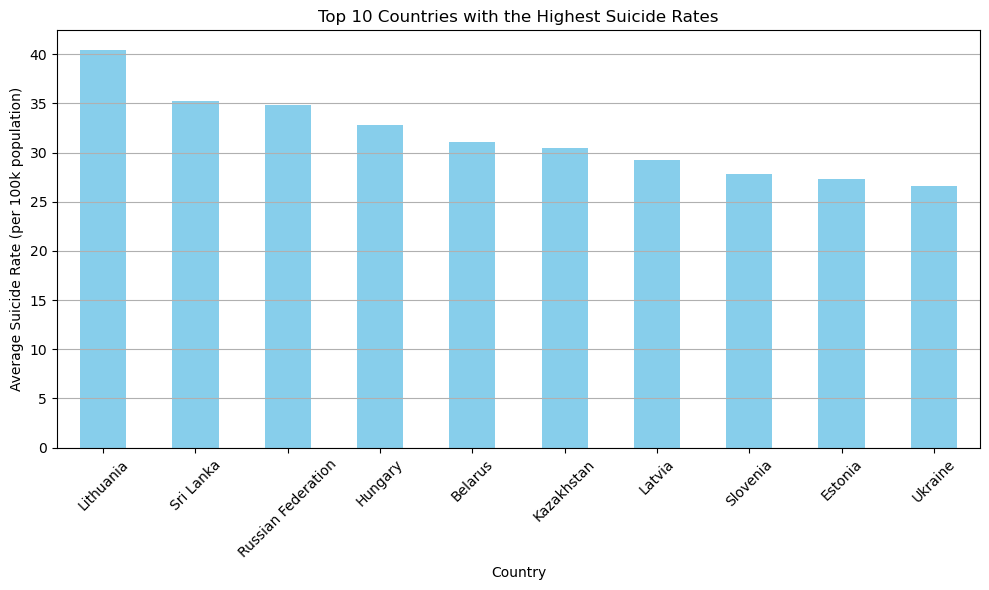

In [ ]:





df['suicides/100k pop'] = pd.to_numeric(df['suicides/100k pop'], errors='coerce')

df = df.dropna(subset=['suicides/100k pop'])


country_avg_suicides = df.groupby('country')['suicides/100k pop'].mean()

top_10_countries = country_avg_suicides.sort_values(ascending=False).head(10)


plt.figure(figsize=(10, 6))
top_10_countries.plot(kind='bar', color='skyblue')
plt.title('Top 10 Countries with the Highest Suicide Rates')
plt.xlabel('Country')
plt.ylabel('Average Suicide Rate (per 100k population)')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


# SUBMIT FORMAT

* **<-zip>**
  - **studentID_name_surname_hw2.ipynb**


# PLAGIARISM

All work on assignments must be done individually. You are encouraged to discuss the given assignments with your classmates, but these discussions should be carried out in an abstract way. That is, discussions related to a particular solution to a specific probem (either in actual code or in pseudocode) will not be tolerated. In short, turning in someone else’s work (including work available on the internet), in whole or in part, as your own will be considered as a violation of academic integrity. Please note that the former conditions also hold for the material attained using AI tools, including ChatGPT, GitHub Copilot, etc.